# ARGENTINE GOVERNMENT DATA (OIL AND GAS)

CSV data set used in this notebook downloable at: https://datos.gob.ar/en/dataset/energia-produccion-petroleo-gas-por-pozo-capitulo-iv/archivo/energia_b5b58cdc-9e07-41f9-b392-fb9ec68b0725

Data property of:
*Secretaría de Energía. Subsecretaría de Planeamiento Energético. Dirección Nacional de Escenarios y Evaluación de Proyectos. Dirección de Información Energética.Tecnología de la Información.*


# EDA

This is a very complete and large data set, so our first step consists of exploratory data analysis (EDA). Although data is provided at a monthly frequency, to reduce complexity we will work with data on a yearly frequency.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
import urllib

# Define some colors for later on
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Set stylistic options for plots generated later on
sns.set_context("paper")
plt.style.use('fivethirtyeight')

In [2]:
# Check for data
data_url = 'http://datos.energia.gob.ar/dataset/c846e79c-026c-4040-897f-1ad3543b407c/resource/b5b58cdc-9e07-41f9-b392-fb9ec68b0725/download/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv'
datafile = False

try:
    df = pd.read_csv('arg_gov_oil_and_gas_dataset.csv')
    print(color.GREEN + color.BOLD + '\n===== DATA SET FOUND! =====' + color.END)
    print('Reading into data frame...')
    df = pd.read_csv('arg_gov_oil_and_gas_dataset.csv')
    print(color.GREEN + 'Data read successfully!' + color.END)
    datafile = True
except:
    print(color.RED + color.BOLD + '====== DATA SET NOT FOUND OR UNREADABLE! ======' + color.END)

while(not datafile):
    data_prompt = input('\nDownload data set (aprox. 100MB)? [y]/n').lower()
    if (data_prompt == 'y' or data_prompt ==''):
        print('Downloading data set. This may take a while, please wait...')
        try:
            urllib.request.urlretrieve(data_url, 'arg_gov_oil_and_gas_dataset.csv')
            print(color.GREEN + 'Data set downloaded successfully!' + color.END)
            print('Reading into data frame...')
            df = pd.read_csv('arg_gov_oil_and_gas_dataset.csv')
            print(color.GREEN + 'Data read successfully!' + color.END)
            break
        except:            
            print(color.RED + color.BOLD + '\n====== COULD NOT DOWNLOAD DATA SET! Check internet connection and/or file/directory permissions and try again. =====' + color.END)
            raise Exception()
    elif (data_prompt == 'n'):
        print(color.RED + color.BOLD + '\n====== DATA SET NOT DOWNLOADED! Please download data set manually and place in the working directory before proceeding. =====' + color.END)
        break
    else:
        print(color.RED + 'Invalid character input. Try again.' + color.END)


===== DATA SET FOUND! =====
Reading into data frame...
Data read successfully!


In [3]:
# Check what the columns are and what shape our dataset is in
print('Columns in the data frame.')
print(df.columns,df.shape)

Columns in the data frame.
Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data'],
      dtype='object') (283913, 40)


In [4]:
# We don't need all these columns. Let's take what we need for now, and leave what we don't behind (commented out)
df=df[['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua',
      #'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       #'vida_util', 'tipoextraccion', 
      'tipoestado', 'tipopozo',
      # 'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
      # 'idusuario',
      'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 
      'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data']].copy()

In [5]:
# Drop an index if it doesn't have a valid anio/año (year) or mes (month) columns since that makes it are useless to us.
df = df.dropna(subset=['anio', 'mes'])

In [6]:
# Our data set has some problems with the anio column, let's make sure it's a valid int
df['anio'] = pd.to_numeric(df['anio'], errors='coerce').astype(int)
# Generate fecha (data) datetime-typed column out of anio and mes
df['fecha'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['mes'].astype(str))
# Now let's see...
print('Dates we generated, sorted from oldest to newest. They should be formated YYYY-MM-DD if all is right.\n')
print(df.sort_values(by=['fecha'])['fecha'])

Dates we generated, sorted from oldest to newest. They should be formated YYYY-MM-DD if all is right.

17791    2006-01-01
17263    2006-01-01
261331   2006-01-01
17611    2006-01-01
17267    2006-01-01
            ...    
157087   2023-12-01
157089   2023-12-01
157091   2023-12-01
157095   2023-12-01
283912   2023-12-01
Name: fecha, Length: 283913, dtype: datetime64[ns]


In [7]:
# Let's check total invalid entries for each column
print('Sum of invalid entries per column. Looks like nothing that is of primary interest to us has invalid entries.\n')
print(df.isna().sum())

Sum of invalid entries per column. Looks like nothing that is of primary interest to us has invalid entries.

idempresa                   0
anio                        0
mes                         0
idpozo                      0
prod_pet                    0
prod_gas                    0
prod_agua                   0
tipoestado                553
tipopozo                  553
empresa                     0
sigla                       0
formprod                    0
profundidad                 0
formacion                   0
idareapermisoconcesion      0
areapermisoconcesion        0
idareayacimiento            0
areayacimiento              0
cuenca                      0
provincia                   0
coordenadax                 0
coordenaday                 0
tipo_de_recurso             0
proyecto                    0
clasificacion             798
subclasificacion          798
sub_tipo_recurso          328
fecha_data                  0
fecha                       0
dtype: int64


In [8]:
# Let's see if we have repeat data for any given well's ID (idpozo)

print('Printing first 5 indexes with the same idpozo')
df.loc[df.duplicated(subset=['idpozo'])].sort_values(by=['idpozo']).head(5)

Printing first 5 indexes with the same idpozo


,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoestado,tipopozo,empresa,...,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,fecha
213169,PEL,2017,7,3640,93.805,1.964,103.446,Extracción Efectiva,Petrolífero,PETROLERA ENTRE LOMAS S.A.,...,Neuquén,-68.45239,-37.95417,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2017-07-31,2017-07-01
213327,PEL,2010,9,3640,100.737,5.611,137.161,Extracción Efectiva,Petrolífero,PETROLERA ENTRE LOMAS S.A.,...,Neuquén,-68.45239,-37.95417,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2010-09-30,2010-09-01
212715,PEL,2008,1,3640,39.476,6.665,29.758,Extracción Efectiva,Petrolífero,PETROLERA ENTRE LOMAS S.A.,...,Neuquén,-68.45239,-37.95417,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2008-01-31,2008-01-01
212699,PEL,2009,1,3640,39.183,3.923,35.869,Extracción Efectiva,Petrolífero,PETROLERA ENTRE LOMAS S.A.,...,Neuquén,-68.45239,-37.95417,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2009-01-31,2009-01-01
213328,PEL,2006,9,3640,37.288,5.669,53.206,Extracción Efectiva,Petrolífero,PETROLERA ENTRE LOMAS S.A.,...,Neuquén,-68.45239,-37.95417,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2006-09-30,2006-09-01


## We can see that the data frame consists of 280k rows and 40 columns

## Now let's get some graphs going to visualize this data set. First up some boxplots to see the distribution for year and month of the data we have.

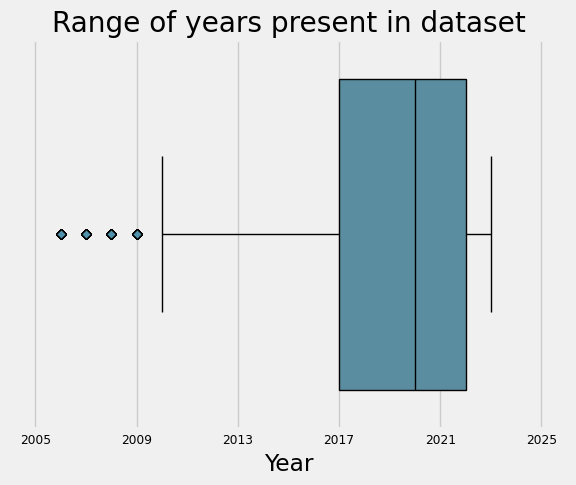

In [9]:
# Generate axes ticks
tick_spacing = 4
ticks = [df['anio'].min() - 1]
while np.max(ticks) < df['anio'].max():
    ticks.append(np.max(ticks) + tick_spacing)

# Generate the plot
fig, ax = plt.subplots()
sns.boxplot( x = df['anio'], 
            color='#5092AB',
            linecolor = 'black',
            flierprops={"marker": "D", "markerfacecolor" : "#5092AB"}
           )
ax.set_xlim(np.min(ticks) - 1, np.max(ticks) + 1)    # Need to +-1 to make sure ends of graph and ticks not cut off
plt.xticks(ticks)
plt.title('Range of years present in dataset')
plt.xlabel('Year')
plt.show()

## We can see old outliers in our dataset. We probably don't want to include data that old in our analysis.

C:\Users\Francisco\AppData\Local\Temp\ipykernel_12332\3660083547.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(hist_df['anio'], rotation=60)


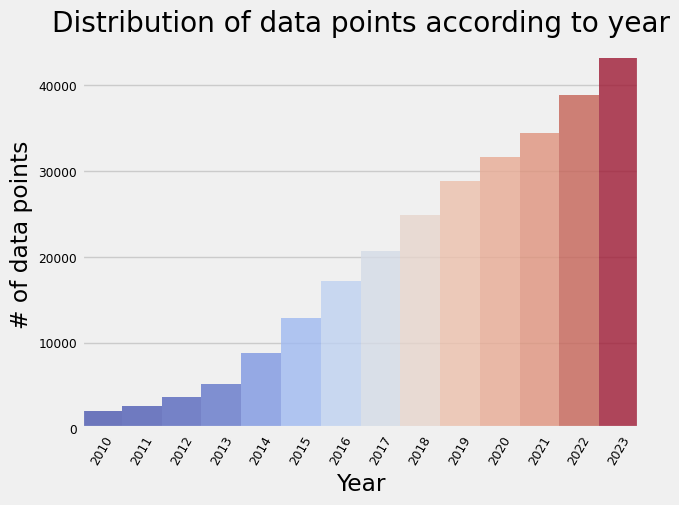

In [10]:
# Filter out data with outlier years via inter-quartile range (IRQ)

#Calculate IQR
Q1 = df['anio'].quantile(0.25)
Q3 = df['anio'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits for identifying outliers
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# Filter the outliers from the dataframe
df['anio']=df['anio'][(df['anio'] >= lower_lim) & (df['anio'] <= upper_lim)]

hist_df = df.groupby(['anio']).size().reset_index(name='count')
hist_df['anio'] = (hist_df['anio'].astype(int)).astype(str)

# Plot a histogram
fig = sns.barplot(data = hist_df,
                  x = 'anio',
                  y = 'count',
                  hue = 'count',
                  legend = None,
                  width = 1,
                  palette = 'coolwarm',
                  alpha = 0.8
                 )
plt.xlabel('Year')
plt.ylabel('# of data points')
fig.set_xticklabels(hist_df['anio'], rotation=60)
plt.title('Distribution of data points according to year')
plt.show()

## We can see that, thankfully, most data is recent.

## We're gonna keep from the entries from the three companies with the most data.

In [11]:
# Group and count number of datapoints by company ID, then sort by count
df_idempresa = df.groupby(['idempresa']).size().reset_index(name='datapoints').sort_values(by = ['datapoints'], ascending = False)

# List the top three companies
print('Top three companies in terms of datapoints')
print(df_idempresa.head(3))

Top three companies in terms of datapoints
   idempresa  datapoints
39       YPF      159804
5        APS       15817
26       PLU       14836


## The three companies with the most datapoints are YPF, APS, and PLU. We'll proceed accordingly.

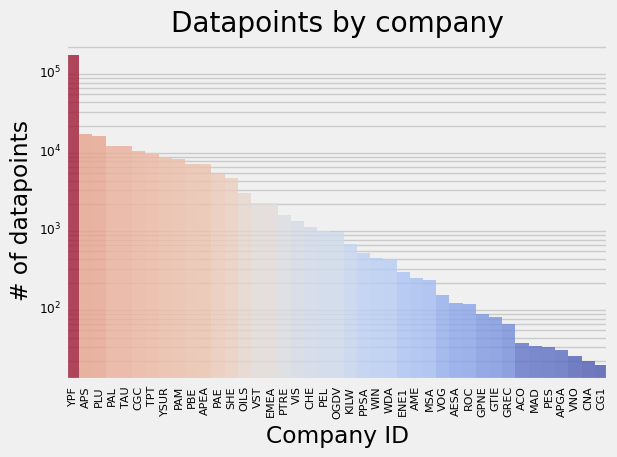

In [12]:
YPF = df.query('idempresa=="YPF" and 2010 <= anio <= 2023')
APS = df.query('idempresa=="APS" and 2010 <= anio <= 2023')
PLU = df.query('idempresa=="PLU" and 2010 <= anio <= 2023')

# Create a histogram 
fig = sns.barplot(data = df_idempresa,
                  x = "idempresa", 
                  y = "datapoints",
                  hue = 'datapoints',
                  hue_norm = LogNorm(vmin=df_idempresa['datapoints'].min(), vmax=df_idempresa['datapoints'].max()),
                  palette = 'coolwarm',
                  alpha = 0.8,
                  legend = None,
                  width = 1)
fig.set_yscale("log")
plt.grid(which = 'both', axis = 'y')
plt.title('Datapoints by company')
plt.xlabel('Company ID')
plt.ylabel('# of datapoints')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

## Note the above graph is *logarithmic* in scale. 

## Let's concatenate data from the top three companies into a new data frame.

In [13]:
companies = ['YPF','APS','PLU']
df_final=df.query('idempresa == @companies and 2010 <= anio <= 2023').sort_values(by = ['idpozo']).reset_index()

#Let's see the "final" data frame after all our filtering
df_final

,index,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoestado,tipopozo,...,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,fecha
0,263328,APS,2021.0,2,10073,13.99,706.32,14.00,Extracción Efectiva,Gasífero,...,Rio Negro,-67.669980,-38.832360,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,TIGHT,2021-02-28,2021-02-01
1,265921,APS,2023.0,4,10073,10.62,391.69,23.57,Extracción Efectiva,Gasífero,...,Rio Negro,-67.669980,-38.832360,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,TIGHT,2023-04-30,2023-04-01
2,276049,APS,2023.0,12,10073,14.34,364.27,21.18,Extracción Efectiva,Gasífero,...,Rio Negro,-67.669980,-38.832360,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,TIGHT,2023-12-31,2023-12-01
3,265759,APS,2020.0,4,10073,14.57,883.68,36.00,Extracción Efectiva,Gasífero,...,Rio Negro,-67.669980,-38.832360,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,TIGHT,2020-04-30,2020-04-01
4,267309,APS,2023.0,5,10073,8.34,304.57,27.79,Extracción Efectiva,Gasífero,...,Rio Negro,-67.669980,-38.832360,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,TIGHT,2023-05-31,2023-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184202,157365,YPF,2023.0,12,164884,21.04,2.92,72.62,Extracción Efectiva,Petrolífero,...,Neuquén,-68.637077,-38.273073,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2023-12-31,2023-12-01
184203,157361,YPF,2023.0,12,164885,22.56,3.40,98.16,Extracción Efectiva,Petrolífero,...,Neuquén,-68.636974,-38.273072,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2023-12-31,2023-12-01
184204,157355,YPF,2023.0,12,164886,0.40,0.05,1.10,Extracción Efectiva,Petrolífero,...,Neuquén,-68.636871,-38.273072,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2023-12-31,2023-12-01
184205,157349,YPF,2023.0,12,164887,1230.46,107.96,133.99,Extracción Efectiva,Petrolífero,...,Neuquén,-68.681921,-38.254225,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2023-12-31,2023-12-01


## We graph production by company by year. Again, note the logarithmic scale of the plot.

Text(0, 0.5, 'Petroleum production in $m^3$')

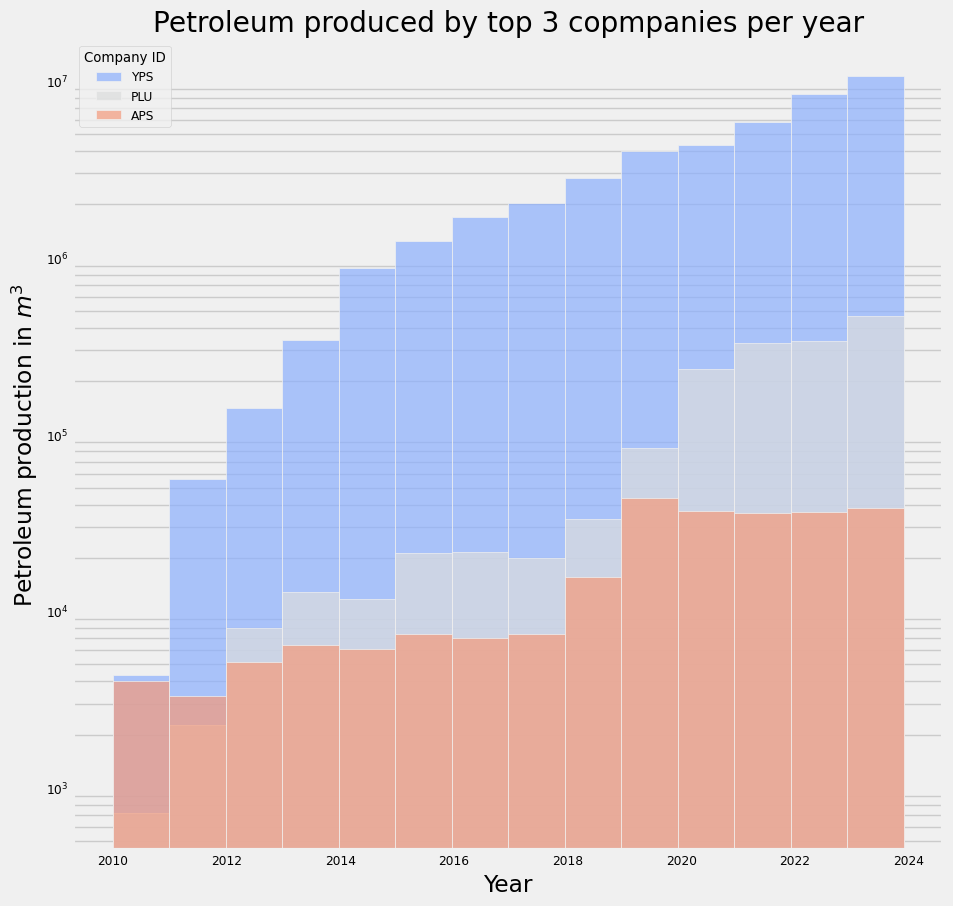

In [14]:
df_prod = df_final.groupby(['idempresa', 'fecha'])['prod_pet'].sum().reset_index()
companies = df_prod['idempresa'].unique()
years = np.sort(df_final['anio'].unique().astype(int))

plt.subplots(figsize = (10,10))
fig = sns.histplot(data = df_prod,
                   stat = 'count',
                   x = 'fecha',
                   multiple = 'layer',
                   hue = 'idempresa',
                   weights = 'prod_pet',
                   palette = 'coolwarm_r',
                   alpha = 0.7,
                   bins = len(years),
                   legend = False
                   )
plt.legend(title='Company ID', loc='upper left', labels=['YPS', 'PLU', 'APS'])     # Can double check correct via legend = True inside plot and commenting this line out
fig.set_yscale("log")
plt.grid(which = 'both', axis = 'both')
plt.title('Petroleum produced by top 3 copmpanies per year')
plt.xlabel('Year')
plt.ylabel('Petroleum production in $m^3$')

## YPF outproduces the other companies by a wide margin.

## Now let's see how the depth of a data entry correlates to it's petroleum production.

In [15]:
# Get rid of outliers with respect to depth (profundiad)

# Calculate interquartile range (IQR) and filter
Q1 = df_final['profundidad'].quantile(0.25)
Q3 = df_final['profundidad'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
df_final = df_final[(df_final['profundidad'] >= lower_lim) & (df_final['profundidad'] <= upper_lim)].reset_index()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_12332\3035421606.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(data = df_depth,


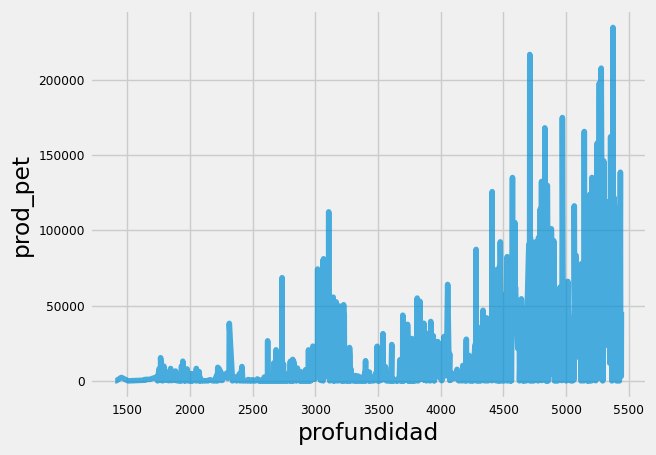

In [43]:
df_depth = df_final.groupby(['profundidad'])['prod_pet'].sum().reset_index()

fig = sns.lineplot(data = df_depth,
                   x = 'profundidad',
                   y = 'prod_pet',
                   palette = 'coolwarm_r',
                   alpha = 0.7,
                   legend = False
                   )
plt.grid(True, which = 'both', axis = 'both')
plt.show()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_12332\793318762.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(data = df_depth,


Text(0, 0.5, 'Petroleum production in $m^3$')

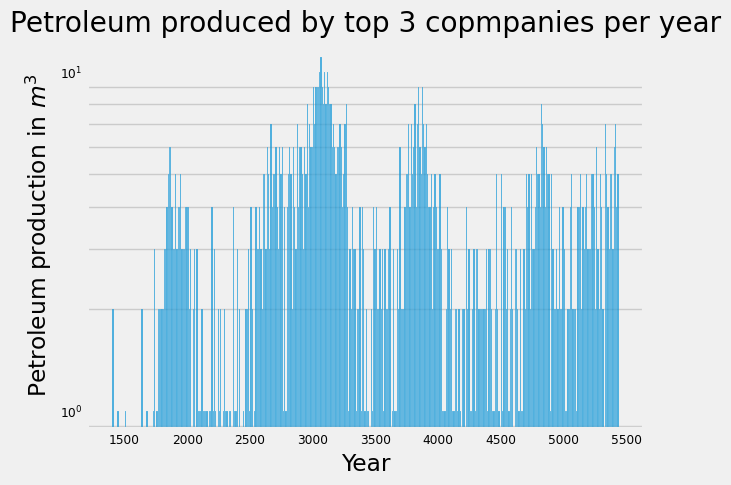

In [46]:
fig = sns.histplot(data = df_depth,
                   x = 'profundidad',
                   palette = 'coolwarm_r',
                   alpha = 0.7,
                   binwidth = 10,
                   legend = False
                   )
fig.set_yscale("log")
plt.grid(which = 'both', axis = 'both')
plt.title('Petroleum produced by top 3 copmpanies per year')
plt.xlabel('Year')
plt.ylabel('Petroleum production in $m^3$')

In [37]:
df_depth.query('5400 <= profundidad <= 5500').sum()

profundidad    130038.000
prod_pet       902068.807
dtype: float64

<Axes: >

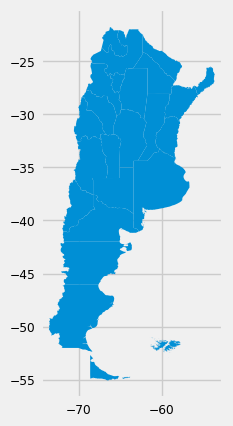

In [19]:
arg_map = gpd.read_file('arg.shp')
arg_map.plot()

**Y OTRA DE LAS COSAS QUE ME INTERESO HACER FUE VER LOS DATOS POR PROVINCIA, VER COMO ESTAN DISTRIBUIDOS LOS POZOS Y CUALES SON LAS CONSECIONES QUE MÁS PRODUJERON**

**ME QUEDO CON NEUQUEN Y RIO NEGRO QUE SON LAS DOS PROVINCIAS QUE REPORTAN MÁS POZOS** 

In [ ]:
#pozos y produccion total por pozo

df_final_pozo=df_final.groupby(['idempresa','idpozo'])['prod_pet'].sum()
df_final_pozo.shape

Q1 = df_final_pozo.quantile(0.25)
Q3 = df_final_pozo.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
df_final_pozo= df_final_pozo[(df_final_pozo>= umbral_inferior) & (df_final_pozo <= umbral_superior)]

print(df_final_pozo)

print(type(df_final_pozo))



# Neuquen, trabajo con los pozos de neuquén

In [ ]:
provincias = gpd.read_file('C:\\Users\\Felipe\\Desktop\\Data_Science_Road_2024\\EDA\\arg.shp')

provincias.head(5)


# Asegurarse de que 'NOM_PROV' sea una columna categórica o de texto
provincias['nam'] = provincias['nam'].astype(str)

# Seleccionar la geometría de la provincia de Neuquén
provincia_neu = provincias[provincias['nam'] == 'Neuquén']

#neuquen_gpd=gpd.GeoDataFrame(provincia_neu)

pozos_neuquen=df_final.query('provincia=="Neuquén"')
#print(pozos_neuquen)


#esto lo hago para plotear los pozos

pozos_sin_duplicados = pozos_neuquen.drop_duplicates(subset=['idpozo'])

print(pozos_sin_duplicados)

In [ ]:


# Convertir las coordenadas de los pozos a un GeoDataFrame
gdf_pozos = gpd.GeoDataFrame(pozos_sin_duplicados, geometry=gpd.points_from_xy(pozos_sin_duplicados['coordenadax'],pozos_sin_duplicados['coordenaday']))



# Graficar el mapa de la provincia de Neuquén
fig, ax = plt.subplots(figsize=(10, 10))
provincia_neu.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_neu.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
gdf_pozos.plot(ax=ax, color='red', markersize=10, label='Pozos')  # Puntos de pozos

# Configuración adicional
ax.set_title('Mapa de la Provincia de Neuquén con Pozos')


# Etiquetar los pozos con sus IDs
#for idx, row in gdf_pozos.iterrows():
 #   ax.text(row['geometry'].x, row['geometry'].y, str(row['idpozo']), fontsize=8, ha='center')
    
    
    # Personalizar el mapa
ax.set_title('Mapa de Neuquen con Pozos')
ax.legend()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)



In [ ]:
# Inicializar un diccionario para almacenar las sumas de producción de petróleo por zona
produccion_petroleo_por_zona = {}



for nombre_zona, dataframe in pozos_por_area.items():
    # Calcular la suma de producción de petróleo por zona
    suma_prod_pet = dataframe['prod_pet'].sum()
    
    # Almacenar la suma en el diccionario
    produccion_petroleo_por_zona[nombre_zona] = suma_prod_pet

# Mostrar las sumas de producción de petróleo por zona
for nombre_zona, suma_prod_pet in produccion_petroleo_por_zona.items():
    print(f"{nombre_zona}: {suma_prod_pet} m3 de petroleo")

# También puedes plotear las sumas de producción por zona, si es necesario
plt.bar(produccion_petroleo_por_zona.keys(), produccion_petroleo_por_zona.values())
plt.title('Suma de Producción de Petróleo por Zona')
plt.xlabel('Zona')
plt.xticks(rotation=90)
plt.ylabel('Producción de Petróleo (M3)')
plt.show()

In [ ]:
#produccion de pozos segun zonas

# Crear un diccionario para almacenar DataFrames separados por área de producción
pozos_por_area = {}

# Iterar sobre cada área de producción y crear un DataFrame separado para cada una
for area, datos_area in pozos_neuquen.groupby('idareayacimiento'):
    pozos_por_area[area] = datos_area.copy()

    

#print(pozos_por_area)

pozos_por_area.keys()

**Busco las áreas de yacimiento que más producen y las grafico en el mapa 

In [ ]:
columnas_deseadas = ['idpozo', 'coordenadax', 'coordenaday', 'prod_pet', 'prod_gas']

# Supongamos que diccionario_zonas ya está creado
for codigo, dataframe in pozos_por_area.items():
    df_zona = dataframe[columnas_deseadas].copy()
    pozos_por_area[codigo] = df_zona
    


produccion_petroleo_por_zona = {}

for nombre_zona, dataframe in pozos_por_area.items():
    # Calcular la suma de producción de petróleo por zona
    suma_prod_pet = dataframe['prod_pet'].sum()
    
    # Almacenar la suma en el diccionario
    produccion_petroleo_por_zona[nombre_zona] = suma_prod_pet

# Filtrar las zonas con sumas mayores a 1e6
zonas_filtradas = {nombre_zona: suma_prod_pet for nombre_zona, suma_prod_pet in produccion_petroleo_por_zona.items() if suma_prod_pet > 1e5}

# Mostrar las zonas filtradas y sus sumas de producción de petróleo
for nombre_zona, suma_prod_pet in zonas_filtradas.items():
    print(f"{nombre_zona}: {suma_prod_pet} barriles de petróleo")

# También puedes plotear las zonas filtradas, si es necesario
plt.bar(zonas_filtradas.keys(), zonas_filtradas.values())
plt.title('Zonas con Suma de Producción de Petróleo Mayor a 1e5')
plt.xticks(rotation=45)
plt.xlabel('Zona')
plt.ylabel('Producción de Petróleo (barriles)')
plt.show()


In [ ]:
#me quedo con los 4 que mas producen y  grafico en el mapa

keys_deseadas = ["BDSS", "LAC", "LCAM", "LCLL"]

pozos_por_area_filtrado = {key: value for key, value in pozos_por_area.items() if key in keys_deseadas}
    
        # Graficar los GeoDataFrames en un mismo mapa
fig, ax = plt.subplots(figsize=(10, 10))

provincia_neu.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_neu.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
    
# Obtener colores únicos para cada dataframe
colores = plt.cm.get_cmap('tab10', len(pozos_por_area_filtrado.keys()))

# Plotear los pozos en el mapa con colores diferentes para cada dataframe

for i, (nombre_zona, dataframe) in enumerate(pozos_por_area_filtrado.items()):
    gdf = gpd.GeoDataFrame(dataframe, geometry=gpd.points_from_xy(dataframe['coordenadax'], dataframe['coordenaday']))
    gdf=gdf.drop_duplicates(subset='idpozo')
    color = colores.colors[i % len(colores.colors)]  # Ciclar colores si hay más dataframes que colores disponibles
    gdf.plot(ax=ax, color=color, markersize=50, alpha=0.7, edgecolor='black', label=nombre_zona)
    
# Personalizar el mapa
plt.title('Distribución de Pozos por Área y Código')
plt.legend()
plt.show()

In [ ]:
#TRABAJO CON LOMA CAMPANA


LCLL = df_final[df_final['idareayacimiento'].str.contains("LCLL")]
LLCL.head()

In [ ]:
from IPython.display import Image


#Esta es la imagen satelital y el área de consesion (intentar con QGIS)

Image('C:\\Users\\Felipe\\Desktop\\Data_Science_Road_2024\\EDA\\imagensatelital.png',width=600 , height=600)

In [ ]:

#formacion productiva y profundidad
LLCL_plus=LLCL.groupby(["formprod", "profundidad","subclasificacion","sub_tipo_recurso"])["prod_pet"].sum().reset_index()

profundidad_media = LLCL_plus.groupby('formprod')['profundidad'].mean().reset_index()
print(profundidad_media)


plt.figure(figsize=(12, 8))
sns.barplot(x='formprod', y='profundidad', data=LLCL_plus,width=0.3, palette='viridis')
plt.title('Formacion y profundidad media')
plt.xlabel('Formación')
plt.ylabel('Profundidad media (m)')
plt.xticks(rotation=45, ha='right')

plt.show()


plt.figure(figsize=(12, 8))
sns.barplot(x='formprod', y='prod_pet', data=LLCL_plus,width=0.3, palette='viridis')
plt.title('Produccion de petroleo de cada formacion')
plt.xlabel('Formación')
plt.ylabel('Profunduccion de petróleo en (m3)')
plt.xticks(rotation=45, ha='right')

plt.show()





In [ ]:
# Gráfico de barras agrupadas para la frecuencia de cada subclasificación por formación
plt.figure(figsize=(12, 8))
sns.countplot(x='formprod', hue='subclasificacion', data=LLCL_plus, palette='viridis')
plt.title('Frecuencia de Subclasificación por Formación')
plt.xlabel('Formación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subclasificación')

plt.show()

**POR ULTIMO GRAFICO LA PRODUCCION DE PETROLEO Y GAS EN FUNCION DE LOS AÑOS Y LAS PRODUCCION DE PETROLEO EN FUNCION DE LA PROFUNDIDAD

In [ ]:
estadisticas_prod_pet= pozos_neuquen.groupby(['provincia','fecha'])['prod_pet'].sum()
estadisticas_prod_gas= pozos_neuquen.groupby(['provincia','fecha'])['prod_gas'].sum()
estadisticas_profundidad = pozos_neuquen.groupby(['provincia','profundidad'])['prod_pet'].sum()



# Convertir la Serie a DataFrame
df_prod_pet = estadisticas_prod_pet.reset_index(name='Produccion_Total_Petroleo')

# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_pet['fecha'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Neuquén por Año')
plt.xlabel('Fecha')
plt.ylabel('Producción Total de Petróleo(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:


datos_empresa_ypf = df_petroleo_por_empresa[df_petroleo_por_empresa['idempresa'] == 'YPF']

plt.figure(figsize=(12, 6))



# Graficar la producción total de petróleo para la provincia de Neuquén
plt.plot(df_prod_pet['fecha'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Graficar la producción de petróleo de YPF
plt.plot(datos_empresa_ypf['fecha'], datos_empresa_ypf['prod_pet'], label='YPF', marker='x', linestyle='-', linewidth=2)

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Neuquén y YPF por Año')
plt.xlabel('Fecha')
plt.ylabel('Producción Total de Petróleo (m³)')
plt.legend()
plt.grid(True)


# Rotar etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [ ]:
# Convertir la Serie a DataFrame
df_prod_gas = estadisticas_prod_gas.reset_index(name='Produccion_Total_Gas')


# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_gas['fecha'], df_prod_gas['Produccion_Total_Gas'], marker='o', label='Neuquén')
#plt.plot(datos_empresa_ypf['fecha'], datos_empresa_ypf['prod_gas'], marker='x', linestyle='-', linewidth=2, label='YPF')

# Personalizar el gráfico
plt.title('Producción Total de Gas en la Provincia de Neuquén por Año')
plt.xlabel('Fecha')
plt.ylabel('Producción Total de  Gas(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:
df_prod_pet_prof=estadisticas_profundidad.reset_index(name='Produccion_Total_pet')



# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_pet_prof['profundidad'], df_prod_pet_prof['Produccion_Total_pet'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Profundidad del pozo vs  Produccion total')
plt.xlabel('Profundidad')
plt.ylabel('Producción Total de Petroleo(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

**Lo mismo se puede hacer para Rio Negro** (SIN TERMINAR)

In [ ]:

# Asegurarse de que 'NOM_PROV' sea una columna categórica o de texto
provincias['nam'] = provincias['nam'].astype(str)

# Seleccionar la geometría de la provincia de Neuquén
provincia_rn = provincias[provincias['nam'] == 'Río Negro']

#print(provincia_rn)
#neuquen_gpd=gpd.GeoDataFrame(provincia_neu)

pozos_rn=df_final.query('provincia=="Rio Negro"')
#print(pozos_neuquen)

pozos_sin_duplicados_rn = pozos_rn.drop_duplicates(subset=['idpozo'])


In [ ]:
# Convertir las coordenadas de los pozos a un GeoDataFrame
gdf_pozos = gpd.GeoDataFrame(pozos_sin_duplicados_rn, geometry=gpd.points_from_xy(pozos_sin_duplicados_rn['coordenadax'],pozos_sin_duplicados_rn['coordenaday']))



# Graficar el mapa de la provincia de Neuquén
fig, ax = plt.subplots(figsize=(10, 10))
provincia_rn.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_rn.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
gdf_pozos.plot(ax=ax, color='red', markersize=10, label='Pozos')  # Puntos de pozos

# Configuración adicional
ax.set_title('Mapa de la Provincia de Rio Negro con Pozos')


# Etiquetar los pozos con sus IDs
#for idx, row in gdf_pozos.iterrows():
 #   ax.text(row['geometry'].x, row['geometry'].y, str(row['idpozo']), fontsize=8, ha='center')
    
    
    # Personalizar el mapa
ax.set_title('Mapa de Rio Negro con Pozos')
ax.legend()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)



In [ ]:
estadisticas_prod_pet= pozos_rn.groupby(['provincia','anio'])['prod_pet'].sum()
estadisticas_prod_gas= pozos_rn.groupby(['provincia','anio'])['prod_gas'].sum()
estadisticas_profundidad = pozos_rn.groupby(['provincia'])['profundidad']



# Convertir la Serie a DataFrame
df_prod_pet = estadisticas_prod_pet.reset_index(name='Produccion_Total_Petroleo')

# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_pet['anio'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Rio Negro por Año')
plt.xlabel('Año')
plt.ylabel('Producción Total de Petróleo(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [ ]:
#TIPOS DE POZO
neuquen=pozos_neuquen.groupby(['idpozo','tipoextraccion', 'tipoestado', 'tipopozo','tipo_de_recurso', 'clasificacion' ,'subclasificacion'])['prod_pet'].sum()


neuquen.head(100)

In [ ]:
df_prod_pet.to_csv('serie_tiempo_neuquen.csv', header=True)
df_final.to_csv('df_final.csv',header=True)